In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections as cl
import scipy as sp
import pandas as pd

In [2]:
import json
from pandas.io.json import json_normalize
import networkx as nx

js = open('friends.json')
js = js.read()
data = json.loads(js)

In [3]:
j = 0
result = {}
r = []
covered = [1] * len(data['nodes'])
while j < len(data['links']):
    i = data['links'][j]['target']
    while (j < len(data['links'])) and (i == data['links'][j]['target']):
        r.append(data['nodes'][data['links'][j]['source']]['name'])
        j += 1
    result[data['nodes'][i]['name']] = tuple(r)
    covered[i] = 0
    r = []
for i in range(len(data['nodes'])):
    if (covered[i]): result[data['nodes'][i]['name']] = ()

In [4]:
G = nx.from_dict_of_lists(result)
n = len(G.nodes())
e = len(G.edges())
print('Nodes:', n)
print('Edges:', e)

Nodes: 357
Edges: 3740


Degree Centers:
1 ) Антон Байнов
2 ) Вова Пермяков
3 ) Артём Орлов
4 ) Максим Мирошников
5 ) Александр Ильин


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


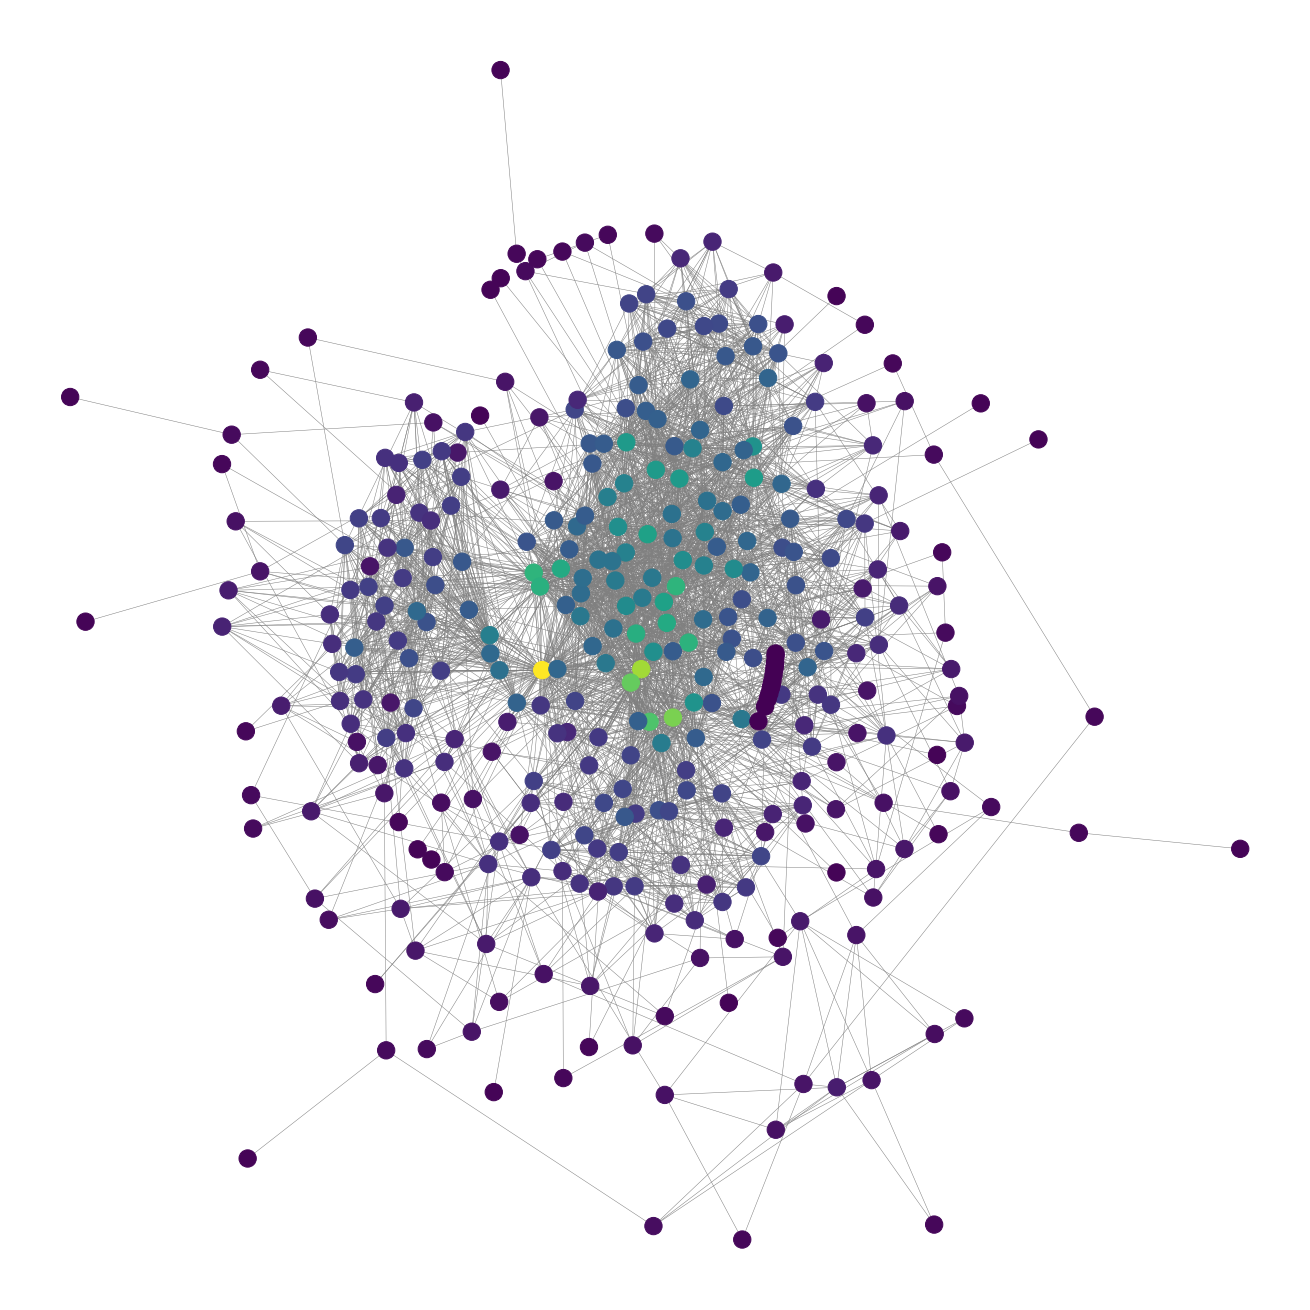

In [5]:
degree = nx.degree_centrality(G)

print('Degree Centers:')
o = [(i, degree[i]) for i in sorted(degree, key=degree.get, reverse=True)]
for i in range(5):
     print(i + 1, ')', o[i][0])

nx.set_node_attributes(G, degree, "degree")

deg = np.array(list(nx.get_node_attributes(G, "degree").values())).astype(dtype=float)

plt.figure(figsize=(18,18))
nx.draw_kamada_kawai(G, node_color=deg, width=0.5, edge_color='gray', font_size=11)